In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
!pip install biopandas
from biopandas.mol2 import PandasMol2

     |████████████████████████████████| 266kB 5.2MB/s 


In [3]:
# Load molecular data
pmol = PandasMol2().read_mol2('/content/drive/My Drive/Molecular Simulation Data/flavanone/Copy of traj3_file.mol2')

# Display data
from IPython.display import display, HTML
print ("All atoms in the data:")
display(HTML(pmol.df.to_html()))

#print('Molecule ID: %s' % pmol.code)
#print('\nRaw MOL2 file contents:\n\n%s\n...' % pmol.mol2_text[:1000])
#pmol.df.head(10)

All atoms in the data:


,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,C1,9.2544,0.7917,30.6087,cb,1,CSP,-0.2524
1,2,C2,9.4751,1.8830,29.6186,cb,1,CSP,0.0178
2,3,C3,9.1023,3.3081,30.1427,cb,1,CSP,-0.0128
3,4,C4,7.8674,3.3119,31.0961,cb,1,CSP,0.0864
4,5,O5,7.6640,2.0494,31.8345,ob,1,CSP,-0.2548
5,6,C6,7.8091,0.8579,31.0750,cb,1,CSP,0.0352
6,7,C7,7.6331,-0.2575,32.2186,c3,1,CSP,-0.0122
7,8,O8,6.1728,-0.4294,32.5395,os,1,CSP,-0.4082
8,9,C9,5.5379,0.4090,33.4509,c,1,CSP,0.7524
9,10,O10,6.0401,1.1606,34.2927,o,1,CSP,-0.5146


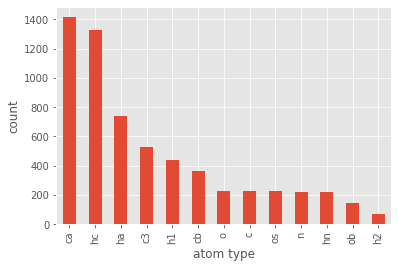

In [4]:
# Plot atoms count 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
pmol.df['atom_type'].value_counts().plot(kind='bar')
plt.xlabel('atom type')
plt.ylabel('count')
plt.show()

In [5]:
# Separate hydrogen atoms from the data

import pandas as pd
h1_atom = pmol.df[pmol.df['atom_type'] == 'h1']
ha_atom = pmol.df[pmol.df['atom_type'] == 'ha']
hc_atom = pmol.df[pmol.df['atom_type'] == 'hc']
hn_atom = pmol.df[pmol.df['atom_type'] == 'hn']
h2_atom = pmol.df[pmol.df['atom_type'] == 'h2']

# Display all hydrogen atoms present in the data
all_hydrogen_atom = pd.concat ([h1_atom,ha_atom,hc_atom,hn_atom,h2_atom],ignore_index=True, sort=False).sort_index()

print ("All Hydrogen atoms in the data:")
display(HTML(all_hydrogen_atom.to_html()))


All Hydrogen atoms in the data:


,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,795,H3,8.8436,1.8103,28.7245,h1,1,CSP,0.1282
1,796,H4,9.9277,3.6910,30.7554,h1,1,CSP,0.1611
2,798,H6,7.0512,0.7290,30.2925,h1,1,CSP,0.1813
3,799,H7,8.0137,-1.1818,31.7668,h1,1,CSP,0.1123
4,800,H8,8.2532,-0.0875,33.1073,h1,1,CSP,0.1123
5,831,H39,5.0511,2.8005,31.4069,h1,1,CSP,0.2398
6,832,H40,6.2147,5.5423,31.8143,h1,1,CSP,0.1282
7,833,H41,3.4009,4.7722,32.7990,h1,1,CSP,0.1611
8,835,H43,4.9021,4.7360,29.0983,h1,1,CSP,0.1813
9,836,H44,3.0521,3.1852,28.3953,h1,1,CSP,0.1123


In [6]:
# Separate all oxygen and nitrogen atoms from the data

os_atom = pmol.df[pmol.df['atom_type'] == 'os']
o_atom= pmol.df[pmol.df['atom_type'] == 'o']
ob_atom = pmol.df[pmol.df['atom_type'] == 'ob']
n_atom= pmol.df[pmol.df['atom_type'] == 'n']
nc_atom= pmol.df[pmol.df['atom_type'] == 'nc']
na_atom= pmol.df[pmol.df['atom_type'] == 'na']
nd_atom= pmol.df[pmol.df['atom_type'] == 'nd']

# Display all oxygen and nitrogen atoms present in the data
all_oxy_nitro_atom = pd.concat ([os_atom,o_atom,ob_atom,n_atom,na_atom,nc_atom,nd_atom],ignore_index=True, sort=False).sort_index()
print ("All Oxygen & Nitrogen Atoms in the molecules:")
display(HTML(all_oxy_nitro_atom.to_html()))

All Oxygen & Nitrogen Atoms in the molecules:


,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,8,O8,6.1728,-0.4294,32.5395,os,1,CSP,-0.4082
1,20,O20,8.9179,4.1982,28.9556,os,1,CSP,-0.4230
2,32,O32,10.8408,1.8897,29.1545,os,1,CSP,-0.2923
3,52,O52,2.9195,2.2195,30.2674,os,1,CSP,-0.4082
4,64,O64,4.3437,6.5507,33.3677,os,1,CSP,-0.4230
5,76,O76,5.8035,4.1229,33.2517,os,1,CSP,-0.2923
6,96,O96,8.4291,7.4206,29.4809,os,1,CSP,-0.4082
7,108,O108,2.4601,10.3917,27.7524,os,1,CSP,-0.4230
8,120,O120,2.2368,7.7926,29.0814,os,1,CSP,-0.2923
9,140,O140,7.1850,11.9501,32.4695,os,1,CSP,-0.4082


In [7]:
# Calculate the hydrogen atoms coordinates
hydrogen_atom_coords=all_hydrogen_atom.loc[:,['x', 'y', 'z']].values

# Calculate the oxygen and nitrogen atoms coordinates
all_oxy_nitro_coord=all_oxy_nitro_atom.loc[:,['x', 'y', 'z']].values

In [8]:
from scipy.spatial import distance
# Calculate the O-H bond coordinates
oh_dist = distance.cdist(hydrogen_atom_coords, all_oxy_nitro_coord, 'euclidean')

In [9]:
# Calculate the O-H bond within 1.5A distance

import numpy as np
location_oh = np.where(oh_dist <= 1.5)

#list_oh= list(zip(location_oh[0], location_oh[1]))
#print("Atoms within 1.5A distance\n", location_oh)

In [10]:
bonded_h_atoms = pd.DataFrame(data = all_hydrogen_atom, index = location_oh[0])
print ("Hydrogen Atoms participated in OH bond:")
display(HTML(bonded_h_atoms.to_html()))

Hydrogen Atoms participated in OH bond:


,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
2500,801,H9,3.9908,-0.5971,32.7128,hn,1,CSP,0.2619
2501,811,H19,8.3937,5.4714,27.2501,hn,1,CSP,0.2838
2502,821,H29,13.1653,1.9570,28.5628,hn,1,CSP,0.2589
2503,838,H46,1.7773,0.8956,31.8229,hn,1,CSP,0.2619
2504,848,H56,4.8823,7.9586,34.9784,hn,1,CSP,0.2838
2505,858,H66,5.8484,3.0255,35.4144,hn,1,CSP,0.2589
2506,875,H83,10.1549,8.5372,30.3634,hn,1,CSP,0.2619
2507,885,H93,0.2919,10.5121,28.2541,hn,1,CSP,0.2838
2508,895,H103,0.6611,5.5603,27.6177,hn,1,CSP,0.2589
2509,912,H120,6.9881,12.3003,34.5083,hn,1,CSP,0.2619


In [11]:
bonded_o_atoms = pd.DataFrame(data = all_oxy_nitro_atom, index = location_oh[1]).sort_index()
print ("Oxygen and Nitrogen Atoms participated in OH bond:")
display(HTML(bonded_o_atoms.to_html()))

Oxygen and Nitrogen Atoms participated in OH bond:


,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
596,11,N11,4.1560,0.1904,33.3281,n,1,CSP,-0.3568
597,23,N23,9.3971,5.5804,27.3357,n,1,CSP,-0.3438
598,35,N35,12.5923,2.0521,27.7329,n,1,CSP,-0.3371
599,55,N55,1.3854,0.7221,30.9050,n,1,CSP,-0.3568
600,67,N67,3.8839,7.8504,35.1113,n,1,CSP,-0.3438
601,79,N79,6.2875,3.9383,35.4303,n,1,CSP,-0.3371
602,99,N99,9.6416,8.2200,31.1771,n,1,CSP,-0.3568
603,111,N111,0.8033,11.0757,28.9227,n,1,CSP,-0.3438
604,123,N123,0.8193,6.2427,28.3495,n,1,CSP,-0.3371
605,143,N143,7.9687,12.5349,34.4107,n,1,CSP,-0.3568


In [12]:
#print('x, y, z coords:', hydrogen_coord.values[0])
#distances = pmol.distance(hydrogen_coord.values[0])
#print(distances)
#pmol.df['distances'] = distances
#pmol.df.head()
#all_within_3A = pmol.df[pmol.df['distances'] <= 3]
#print("Atoms within 3A distance\n", all_within_3A)
#all_within_3A.tail()